In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
state=pd.read_csv('state.csv')

In [6]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [7]:
state['Population'].mean()

6162876.3

In [8]:
#절사평균
trim_mean(state['Population'],0.1)
#0.1 removes 10%(5% each of max and min)

4783697.125

In [10]:
state['Population'].median()

4436369.5

In [13]:
## 평균보다 작은 곳은 작은 가중치 큰 곳은 큰 가중치
#가중평균
np.average(state['Murder.Rate'],weights=state['Population'])

4.445833981123393

In [14]:
#가중 중간값
wquantiles.median(state['Murder.Rate'],weights=state['Population'])

4.4

In [15]:
state['Population'].std()

6848235.347401142

In [16]:
#사분위범위 Interquartile Range
state['Population'].quantile(0.75)-state['Population'].quantile(0.25)

4847308.0

In [17]:
#중위절대편차=Median Average Deviation, 편차치중위값
robust.scale.mad(state['Population'])

3849876.1459979336

In [18]:
#백분위수0.05<-5번째로작은값
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population(millions)')

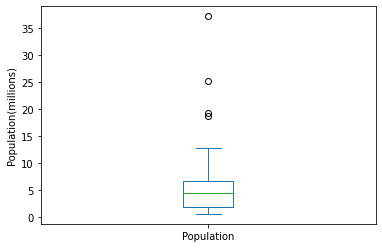

In [19]:
ax=(state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population(millions)')

In [ ]:
#특이점(metric) 상자에서 IRQ1.5보다 더 떨어진 값
#주절반이 200만 700만 사이

In [20]:
#도수분포표 Frequency Table
binnedPopulation=pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

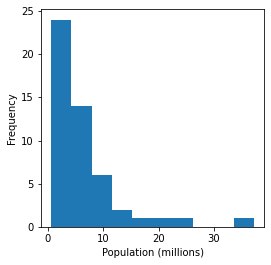

In [21]:
ax=(state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per100,000)')

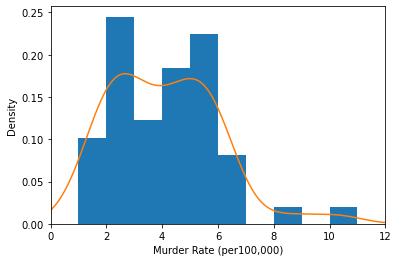

In [23]:
ax=state['Murder.Rate'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per100,000)')

In [24]:
dfw=pd.read_excel('dfw_airline.csv.xlsx')

In [25]:
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

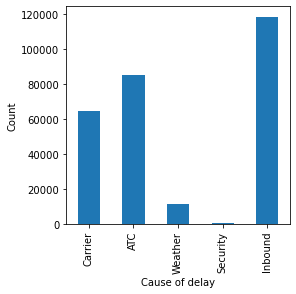

In [26]:
ax=dfw.transpose().plot.bar(figsize=(4,4),legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [10]:
sp500_sym = pd.read_csv('sp500_sectors.csv')
sp500_px = pd.read_csv('sp500_data.csv.gz', index_col=0)

In [11]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

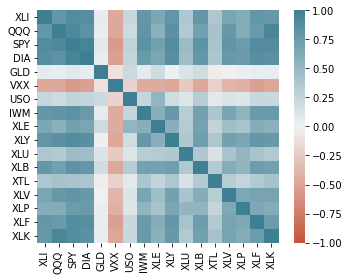

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

In [15]:
sp500_px.columns

Index(['ADS', 'CA', 'MSFT', 'RHT', 'CTSH', 'CSC', 'EMC', 'IBM', 'XRX', 'ALTR',
       ...
       'WAT', 'ALXN', 'AMGN', 'BXLT', 'BIIB', 'CELG', 'GILD', 'REGN', 'VRTX',
       'HSIC'],
      dtype='object', length=517)

In [17]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


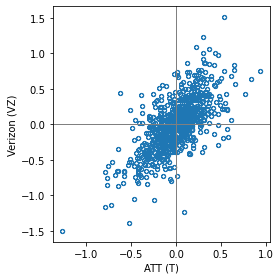

In [18]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

In [20]:
kc_tax = pd.read_csv('kc_tax.csv.gz')

In [21]:
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [23]:
kc_tax0=kc_tax.loc[(kc_tax.TaxAssessedValue<750000)&
                  (kc_tax.SqFtTotLiving>100)&
                  (kc_tax.SqFtTotLiving<3500),:]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

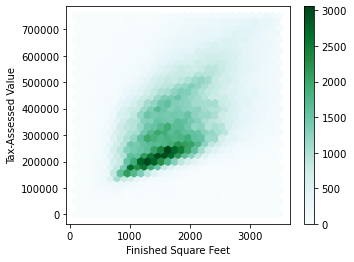

In [27]:
ax=kc_tax0.plot.hexbin(x='SqFtTotLiving',y='TaxAssessedValue',
                     gridsize=30, sharex=False,figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [ ]:
fig, ax=plt.subplots(figsize=(4,4))
ax=sns.kdeplot(data=kc_tax0,x='SqFtTotLiving', y='TaxAssessedValue',ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

In [3]:
lc_loans=pd.read_csv('lc_loans.csv')
lc_loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [5]:
crosstab=lc_loans.pivot_table(index='grade',columns='status',
                             aggfunc=lambda x:len(x),margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [7]:
df=crosstab.copy().loc['A':"G",:]
df.loc[:,'Charged Off':'Late']=df.loc[:,'Charged Off':'Late'].div(df['All'],axis=0)
df['All']=df['All']/sum(df['All'])
perc_crosstab=df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [9]:
airline_stats=pd.read_csv('airline_stats.csv')
airline_stats

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


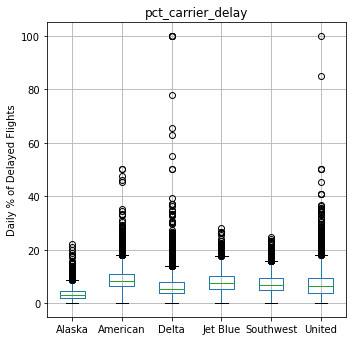

In [13]:
ax=airline_stats.boxplot(by='airline',column='pct_carrier_delay',
                        figsize=(5,5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')
plt.tight_layout()
plt.show()

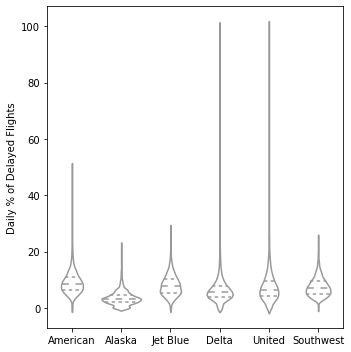

In [16]:
fig,ax=plt.subplots(figsize=(5,5))
sns.violinplot(data=airline_stats,x='airline',y='pct_carrier_delay',
               ax=ax,inner='quartile',color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.tight_layout()
plt.show()

In [17]:
kc_tax0=pd.read_csv('kc_tax.csv.gz')

In [18]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


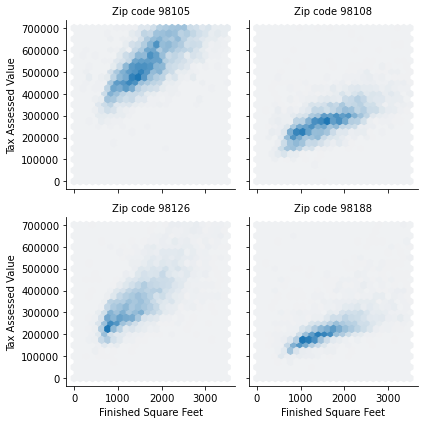

In [20]:
def hexbin(x,y,color,**kwargs):
    cmap=sns.light_palette(color,as_cmap=True)
    plt.hexbin(x,y,gridsize=25,cmap=cmap,**kwargs)
g=sns.FacetGrid(kc_tax_zip,col='ZipCode',col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()